In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("realtor-data.zip.csv")
df.shape

(2226382, 12)

In [28]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [30]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [31]:
# Calculate percentage of NaN values for each column
nan_percentage = (df.isna().sum() / len(df)) * 100

# Display results
print("Percentage of NaN values in each column:")
print(nan_percentage)

# Get total percentage of NaN values in entire dataset
total_nan_percentage = (df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"\nTotal percentage of NaN values in dataset: {total_nan_percentage:.2f}%")


Percentage of NaN values in each column:
brokered_by        0.203604
status             0.000000
price              0.069215
bed               21.618797
bath              22.986666
acre_lot          14.624130
street             0.488056
city               0.063197
state              0.000359
zip_code           0.013430
house_size        25.533983
prev_sold_date    32.981627
dtype: float64

Total percentage of NaN values in dataset: 9.88%


In [32]:
if (df['bed'] < 0).any() or (df['bath'] < 0).any() or (df['acre_lot'] < 0).any():
    print("Negative values found in 'bed', 'bath', or 'acre_lot' columns")
else:
    print("No negative values found in 'bed', 'bath', or 'acre_lot' columns")

No negative values found in 'bed', 'bath', or 'acre_lot' columns


In [33]:
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [34]:
df.status.unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

In [35]:
# Get rows where status is ready_to_build and no NaN values exist
complete_ready = df[(df['status'] == 'ready_to_build') & (df.isna().all(axis=1))]
len(complete_ready)


0

In [36]:
df.dropna(inplace=True)

In [37]:
df.isna().sum().sum()

np.int64(0)

In [38]:

# Calculate days since last sale
df['days_since_last_sale'] = (pd.to_datetime('now') - pd.to_datetime(df['prev_sold_date'])).dt.days

# Drop the original prev_sold_date column
df.drop('prev_sold_date', axis=1, inplace=True)


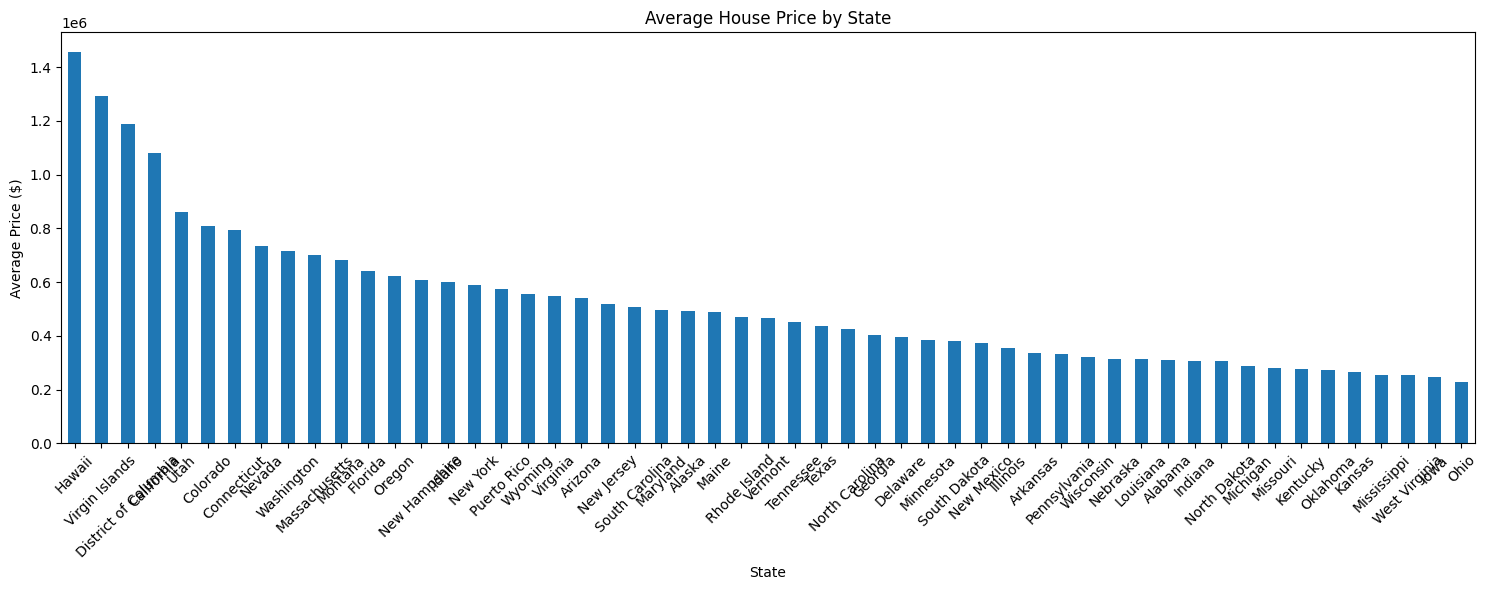

In [39]:
# Average price by state
plt.figure(figsize=(15, 6))
df.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average House Price by State')
plt.xlabel('State')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

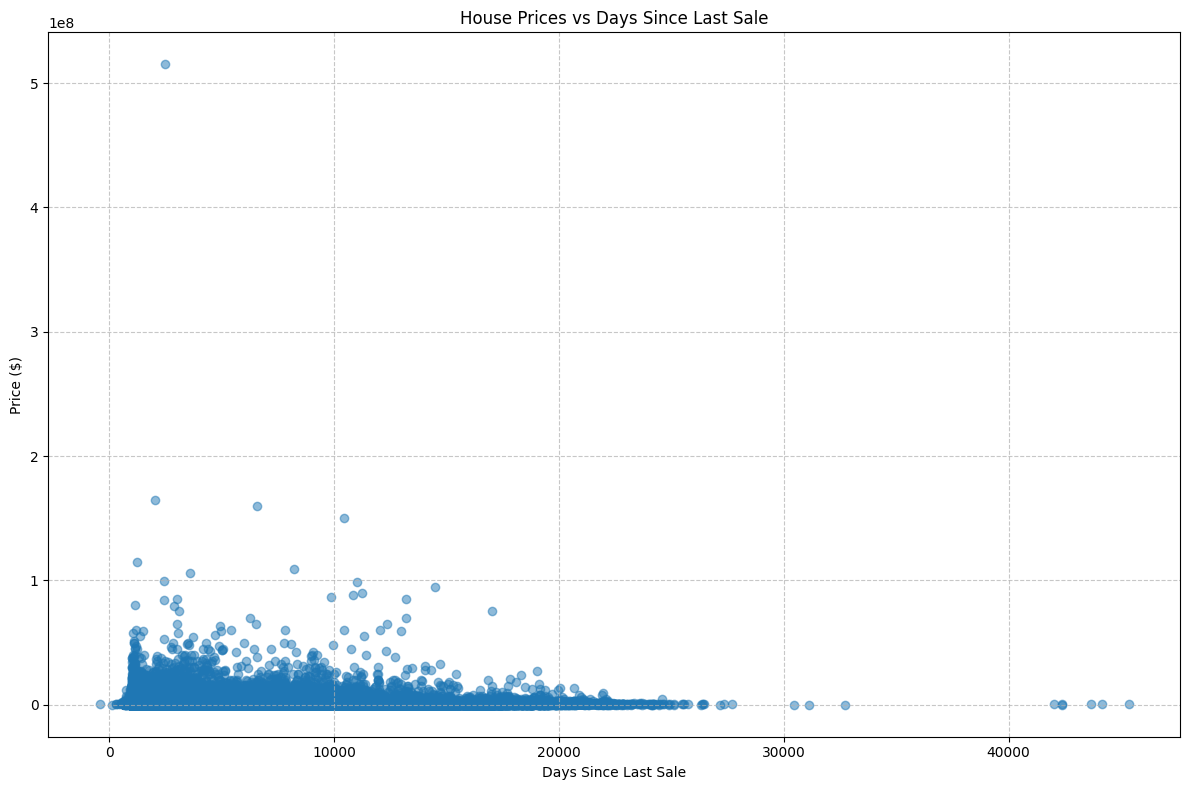

In [40]:
plt.figure(figsize=(12, 8))
plt.scatter(df['days_since_last_sale'], df['price'], alpha=0.5)
plt.title('House Prices vs Days Since Last Sale')
plt.xlabel('Days Since Last Sale')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


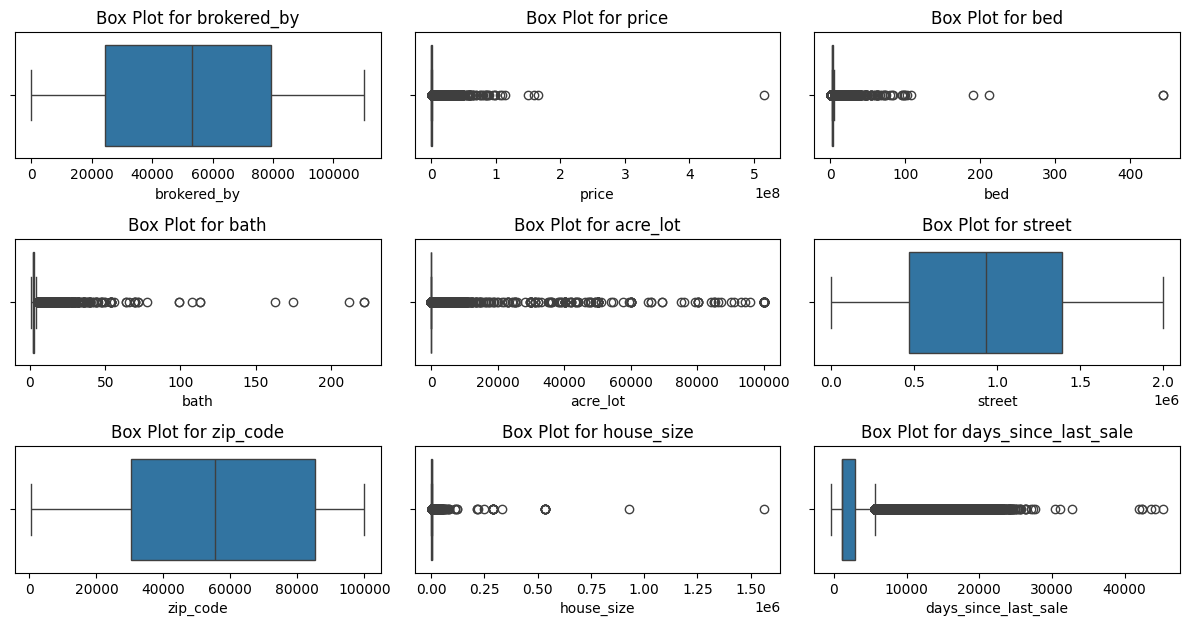

In [41]:
import seaborn as sns
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Iterate through numeric columns and create boxplots
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(4, 3, i)  # Adjust the number of rows and columns based on your need
    sns.boxplot(data=df, x=column)
    plt.title(f"Box Plot for {column}")

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
df.drop(columns=["city"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084909 entries, 502 to 2226381
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brokered_by           1084909 non-null  float64
 1   status                1084909 non-null  object 
 2   price                 1084909 non-null  float64
 3   bed                   1084909 non-null  float64
 4   bath                  1084909 non-null  float64
 5   acre_lot              1084909 non-null  float64
 6   street                1084909 non-null  float64
 7   state                 1084909 non-null  object 
 8   zip_code              1084909 non-null  float64
 9   house_size            1084909 non-null  float64
 10  days_since_last_sale  1084909 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 99.3+ MB


In [43]:
# Using pandas get_dummies
df = pd.get_dummies(df, columns=["status",'state'], prefix=["status",'state'])


In [44]:

# Print the number of unique values for each column in df
print(df.nunique())



brokered_by            82809
price                  37948
bed                       70
bath                      62
acre_lot                6165
                       ...  
state_Virginia             2
state_Washington           2
state_West Virginia        2
state_Wisconsin            2
state_Wyoming              2
Length: 64, dtype: int64


In [45]:
# Drop outliers using IQR method
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Get the original row count
original_count = len(df)

# Apply outlier removal
df = remove_outliers(df)

# Calculate removed rows
removed_rows = original_count - len(df)

# Calculate percentage
removal_percentage = (removed_rows / original_count) * 100

print(f"Total rows before outlier removal: {original_count}")
print(f"Total rows after outlier removal: {len(df)}")
print(f"Number of outliers removed: {removed_rows}")
print(f"Percentage of rows removed as outliers: {removal_percentage:.2f}%")



Total rows before outlier removal: 1084909
Total rows after outlier removal: 668041
Number of outliers removed: 416868
Percentage of rows removed as outliers: 38.42%


In [46]:
# Combine bed and bath into n_rooms
df['n_rooms'] = df['bed'] + df['bath']

# Drop original columns if needed
df = df.drop(['bed', 'bath'], axis=1)


In [47]:
# First split features and target
X = df.drop(columns="price")
y = df['price']
from sklearn.model_selection import train_test_split

# Split with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3,  
    random_state=42
)



In [48]:
X_train.columns

Index(['brokered_by', 'acre_lot', 'street', 'zip_code', 'house_size',
       'days_since_last_sale', 'status_for_sale', 'status_sold',
       'state_Alabama', 'state_Alaska', 'state_Arizona', 'state_Arkansas',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Delaware', 'state_District of Columbia', 'state_Florida',
       'state_Georgia', 'state_Hawaii', 'state_Idaho', 'state_Illinois',
       'state_Indiana', 'state_Iowa', 'state_Kansas', 'state_Kentucky',
       'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Puerto Rico', 'state_Rhode Island', 'state_So

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Set a significance level (commonly 0.05)
alpha = 0.05

# -------------------------------
# 1. Identify numeric and categorical features
# -------------------------------
# (Assumes that X_train is a DataFrame)
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# -------------------------------
# 2. Test numeric features using Pearson correlation
# -------------------------------
cols_to_drop_numeric = []
print("Evaluating numeric features:")
for col in numeric_cols:
    # Compute Pearson correlation between the feature and price
    corr, pval = pearsonr(X_train[col], y_train)
    print(f"  {col}: correlation = {corr:.3f}, p-value = {pval:.3f}")
    if pval > alpha:
        cols_to_drop_numeric.append(col)
        print(f"    --> Marking '{col}' for removal (p-value > {alpha})")

# -------------------------------
# 3. Test categorical features using an ANOVA F-test
# -------------------------------
# (While you mentioned chi-square/Fisher/McNemar, those are not ideal with a continuous target.
#  Instead, we use an OLS model with a categorical predictor – equivalent to a one-way ANOVA.)
cols_to_drop_categorical = []
print("\nEvaluating categorical features:")
for col in categorical_cols:
    # Create a temporary dataframe with the feature and target
    df_temp = pd.concat([X_train[col], y_train], axis=1)
    # Fit an OLS model: price ~ C(feature)
    model = smf.ols(formula=f"price ~ C({col})", data=df_temp).fit()
    anova_results = anova_lm(model, typ=2)
    # The ANOVA table’s row for the categorical predictor is typically labeled "C(col)"
    pval = anova_results['PR(>F)'][0]
    print(f"  {col}: ANOVA p-value = {pval:.3f}")
    if pval > alpha:
        cols_to_drop_categorical.append(col)
        print(f"    --> Marking '{col}' for removal (p-value > {alpha})")

# -------------------------------
# 4. Drop non-significant features from X_train and X_test
# -------------------------------
cols_to_drop = cols_to_drop_numeric + cols_to_drop_categorical
print("\nDropping the following columns:", cols_to_drop)
X_train = X_train.drop(columns=cols_to_drop)
X_test  = X_test.drop(columns=cols_to_drop)

# -------------------------------
# 5. Check for multicollinearity among remaining numeric features using VIF
# -------------------------------
def calculate_vif(df):
    """Calculates VIF for each column in the dataframe."""
    vif_df = pd.DataFrame()
    vif_df["feature"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i)
                     for i in range(df.shape[1])]
    return vif_df

# Get the remaining numeric features
remaining_numeric = X_train.select_dtypes(include=['number']).columns.tolist()
print("\nCalculating VIF for remaining numeric features:")
vif_df = calculate_vif(X_train[remaining_numeric])
print(vif_df)

# Set a VIF threshold (commonly 10); drop the variable with the highest VIF iteratively
vif_threshold = 10
while vif_df['VIF'].max() > vif_threshold:
    feature_to_drop = vif_df.sort_values('VIF', ascending=False)['feature'].iloc[0]
    max_vif = vif_df['VIF'].max()
    print(f"Dropping '{feature_to_drop}' due to high VIF ({max_vif:.2f})")
    X_train = X_train.drop(columns=[feature_to_drop])
    X_test  = X_test.drop(columns=[feature_to_drop])
    remaining_numeric = X_train.select_dtypes(include=['number']).columns.tolist()
    vif_df = calculate_vif(X_train[remaining_numeric])
    print(vif_df)

# -------------------------------
# Final selected features
# -------------------------------
print("\nFinal features in X_train:", X_train.columns.tolist())


Evaluating numeric features:
  brokered_by: correlation = 0.019, p-value = 0.000
  acre_lot: correlation = -0.036, p-value = 0.000
  street: correlation = 0.009, p-value = 0.000
  zip_code: correlation = 0.290, p-value = 0.000
  house_size: correlation = 0.404, p-value = 0.000
  days_since_last_sale: correlation = 0.003, p-value = 0.038
  n_rooms: correlation = 0.383, p-value = 0.000

Evaluating categorical features:

Dropping the following columns: []

Calculating VIF for remaining numeric features:
                feature        VIF
0           brokered_by   3.878576
1              acre_lot   3.395987
2                street   3.692812
3              zip_code   4.274093
4            house_size  22.136841
5  days_since_last_sale   3.725654
6               n_rooms  29.759079
Dropping 'n_rooms' due to high VIF (29.76)
                feature       VIF
0           brokered_by  3.721295
1              acre_lot  3.362055
2                street  3.527241
3              zip_code  4.095916
4

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer

# Get numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Get the difference between all columns and numeric columns
categorical_features = np.setdiff1d(X_train.columns, numeric_features)


# Define transformers
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', MaxAbsScaler(), categorical_features)  # Preserves sparsity
])

# Fit only on training data, transform both train and test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_transformed, columns=list(numeric_features) + list(categorical_features))
X_test = pd.DataFrame(X_test_transformed, columns=list(numeric_features) + list(categorical_features))




# PIPELINE

In [51]:
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
ada = AdaBoostRegressor()
lgbm = lgb.LGBMRegressor(verbose=-1)

# Dictionary to store all models
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'Extra Trees': et,
    'Gradient Boosting': gb,
    'AdaBoost': ada,
}

# Fit all models with tqdm progress bar
for name, model in tqdm(models.items(), desc="Fitting Models"):
    model.fit(X_train, y_train)

# Make predictions with tqdm progress bar
predictions = {}
for name, model in tqdm(models.items(), desc="Making Predictions"):
    predictions[name] = model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

# Print performance metrics for all models
for name, y_pred in predictions.items():
    print(f"{name} Performance Metrics:", evaluate_model(y_test, y_pred))


Making Predictions: 100%|██████████| 8/8 [03:12<00:00, 24.05s/it] 

KNN Performance Metrics: {'MAE': np.float64(106603.49049712342), 'MSE': np.float64(22125057131.212563), 'RMSE': np.float64(148744.93985078135), 'R2': 0.5272650711850706}
Decision Tree Performance Metrics: {'MAE': np.float64(85755.05734408446), 'MSE': np.float64(16335246664.254404), 'RMSE': np.float64(127809.41539751446), 'R2': 0.6509730292128109}
Random Forest Performance Metrics: {'MAE': np.float64(62224.3892732377), 'MSE': np.float64(8384718672.344758), 'RMSE': np.float64(91568.10947237449), 'R2': 0.8208479480438351}
XGBoost Performance Metrics: {'MAE': np.float64(79046.91160306701), 'MSE': np.float64(12532276364.141508), 'RMSE': np.float64(111947.65010549131), 'R2': 0.7322291761889445}
LightGBM Performance Metrics: {'MAE': np.float64(83223.52010500433), 'MSE': np.float64(13669167465.993034), 'RMSE': np.float64(116915.21486099674), 'R2': 0.7079377978247317}
Extra Trees Performance Metrics: {'MAE': np.float64(66334.04920913314), 'MSE': np.float64(9388071202.216768), 'RMSE': np.float64

*RESULTS*

Random Forest Performance Metrics: {'MAE': np.float64(62279.13585616547), 'MSE': np.float64(8394878451.226537), 'RMSE': np.float64(91623.56929975243), 'R2': 0.8206308691762882}

KNN Performance Metrics: {'MAE': np.float64(106603.49049712342), 'MSE': np.float64(22125057131.212563), 'RMSE': np.float64(148744.93985078135), 'R2': 0.5272650711850706}

Decision Tree Performance Metrics: {'MAE': np.float64(85758.14194189), 'MSE': np.float64(16321860398.965132), 'RMSE': np.float64(127757.03659276514), 'R2': 0.6512590467869619}

XGBoost Performance Metrics: {'MAE': np.float64(78914.79796375758), 'MSE': np.float64(12488154527.09496), 'RMSE': np.float64(111750.41175358128), 'R2': 0.7331719052120464}

LightGBM Performance Metrics: {'MAE': np.float64(83200.9865874347), 'MSE': np.float64(13666327842.154995), 'RMSE': np.float64(116903.0702854078), 'R2': 0.7079984706340707}

Extra Trees Performance Metrics: {'MAE': np.float64(66324.7937308458), 'MSE': np.float64(9378454660.494858), 'RMSE': np.float64(96842.42180209486), 'R2': 0.7996152927411627}

Gradient Boosting Performance Metrics: {'MAE': np.float64(92991.64498530212), 'MSE': np.float64(16545698956.24227), 'RMSE': np.float64(128630.08573518977), 'R2': 0.6464764013089004}

AdaBoost Performance Metrics: {'MAE': np.float64(193032.4920216216), 'MSE': np.float64(47542619961.17762), 'RMSE': np.float64(218042.70215069712), 'R2': -0.015819165109238087}